# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [5]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

# Create a newsapi client
from newsapi import NewsApiClient

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DEV\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
# Read your api key environment variable
load_dotenv()
key = os.getenv('news_api')

In [7]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=key)

In [8]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(q='bitcoin', language='en', sort_by='relevancy')

In [9]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(q='ethereum', language='en', sort_by='relevancy')

In [10]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiment = []

for article in btc_news["articles"]:
    try:
        date = article["publishedAt"][:10]
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiment.append({
            "date": date,
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

btc_df = pd.DataFrame(btc_sentiment)

btc_df.head()

,date,text,compound,positive,negative,neutral
0,2021-11-05,A similar hoax earlier this year tied Walmart ...,-0.2732,0.000,0.063,0.937
1,2021-10-10,"Specifically, why did someone make a massive p...",0.5461,0.121,0.000,0.879
2,2021-10-28,Theres a big new presence slurping up power fr...,0.3612,0.096,0.000,0.904
3,2021-10-08,"Last week, the Wall Street Journal ran a piece...",0.3400,0.099,0.000,0.901
4,2021-10-26,"For all the talk of democratizing finance, the...",0.0000,0.000,0.000,1.000


In [11]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiment = []

for article in eth_news["articles"]:
    try:
        date = article["publishedAt"][:10]
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiment.append({
            "date": date,
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

eth_df = pd.DataFrame(eth_sentiment)

eth_df.head()

,date,text,compound,positive,negative,neutral
0,2021-10-16,A new cross-chain bridge is currently connecte...,0.0000,0.000,0.0,1.000
1,2021-10-14,Mark Cuban has some advice for people who are ...,0.0000,0.000,0.0,1.000
2,2021-11-05,Ethereum and bitcoin are the two biggest crypt...,0.4588,0.094,0.0,0.906
3,2021-11-01,Elon Musk\r\npicture alliance / Getty Images\r...,0.5267,0.093,0.0,0.907
4,2021-11-01,Cryptocurrency and business continuity line im...,0.4588,0.097,0.0,0.903


In [12]:
# Describe the Bitcoin Sentiment
print(f'Bitcoin mean positive score:{format(btc_df.positive.mean(), ".5f")}')
print(f'Bitcoin highest negative score:{format(btc_df.negative.max(), ".5f")}')  
print(f'Bitcoin highest positve score:{format(btc_df.positive.max(), ".5f")}')

Bitcoin mean positive score:0.05925
Bitcoin highest negative score:0.06300
Bitcoin highest positve score:0.19900


In [13]:
# Describe the Ethereum Sentiment
print(f'Ethereum mean positive score:{format(eth_df.positive.mean(), ".5f")}')
print(f'Ethereum highest negative score:{format(eth_df.negative.max(), ".5f")}')
print(f'Ethereum highest positve score:{format(eth_df.positive.max(), ".5f")}')

Ethereum mean positive score:0.04855
Ethereum highest negative score:0.08700
Ethereum highest positve score:0.20800


### Questions:

Q: Which coin had the highest mean positive score?
- Bitcoin

Q: Which coin had the highest compound score?

- Bitcoin

Q. Which coin had the highest positive score?

- Ethereum 

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [14]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [15]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()
print(lemmatizer)

# download stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Create a list of stopwords
sw = stopwords.words('english')


<WordNetLemmatizer>


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DEV\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DEV\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DEV\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    for i in punctuation:
        text = text.replace(i, '')
    
    complier = re.compile('[^a-zA-Z ]')
    text = complier.sub('', text)
    
    # Create a tokenized list of the words
    tokens = word_tokenize(text)
    
    # Lemmatize words into root words
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
   
    # Convert the words to lowercase
    tokens = [token.lower() for token in tokens] 
    
    # Remove the stop words
    tokens = [token for token in tokens if token not in sw]
    
    return tokens

In [17]:
# Create a new tokens column for Bitcoin
btc_tokens = []

for article in btc_news["articles"]:
    try:
        text = article["content"]
        tokens = tokenizer(text)
        btc_tokens.append(tokens)
    
    except AttributeError:
        pass

btc_df['tokens'] = btc_tokens
btc_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-11-05,A similar hoax earlier this year tied Walmart ...,-0.2732,0.000,0.063,0.937,"[similar, hoax, earlier, year, tied, walmart, ..."
1,2021-10-10,"Specifically, why did someone make a massive p...",0.5461,0.121,0.000,0.879,"[specifically, someone, make, massive, purchas..."
2,2021-10-28,Theres a big new presence slurping up power fr...,0.3612,0.096,0.000,0.904,"[theres, big, new, presence, slurping, power, ..."
3,2021-10-08,"Last week, the Wall Street Journal ran a piece...",0.3400,0.099,0.000,0.901,"[last, week, wall, street, journal, ran, piece..."
4,2021-10-26,"For all the talk of democratizing finance, the...",0.0000,0.000,0.000,1.000,"[talk, democratizing, finance, vast, majority,..."


In [18]:
# Create a new tokens column for Ethereum
eth_tokens = []

for article in eth_news["articles"]:
    try:
        text = article["content"]
        tokens = tokenizer(text)
        eth_tokens.append(tokens)
    
    except AttributeError:
        pass

eth_df['tokens'] = eth_tokens
eth_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-10-16,A new cross-chain bridge is currently connecte...,0.0000,0.000,0.0,1.000,"[new, crosschain, bridge, currently, connected..."
1,2021-10-14,Mark Cuban has some advice for people who are ...,0.0000,0.000,0.0,1.000,"[mark, cuban, ha, advice, people, new, investi..."
2,2021-11-05,Ethereum and bitcoin are the two biggest crypt...,0.4588,0.094,0.0,0.906,"[ethereum, bitcoin, two, biggest, cryptocurren..."
3,2021-11-01,Elon Musk\r\npicture alliance / Getty Images\r...,0.5267,0.093,0.0,0.907,"[elon, muskpicture, alliance, getty, imagesa, ..."
4,2021-11-01,Cryptocurrency and business continuity line im...,0.4588,0.097,0.0,0.903,"[cryptocurrency, business, continuity, line, i..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [19]:
from collections import Counter
from nltk import ngrams

In [20]:
# Generate the Bitcoin N-grams where N=2
btc_ngram = []
for btc in btc_tokens:
    btc_ngram.append(list(ngrams(btc, n=2)))

In [21]:
# Generate the Ethereum N-grams where N=2
eth_ngram = []
for eth in eth_tokens:
    eth_ngram.append(list(ngrams(eth, n=2)))

In [22]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [23]:
# Use token_count to get the top 10 words for Bitcoin
top10_btc_words_list = []
for btc in btc_tokens:
    for i in btc:
        top10_btc_words_list.append(i)
token_count(top10_btc_words_list, 10)

[('bitcoin', 22),
 ('char', 19),
 ('us', 7),
 ('reuters', 6),
 ('may', 5),
 ('commission', 5),
 ('illustration', 5),
 ('new', 5),
 ('taken', 5),
 ('exchange', 5)]

In [24]:
# Use token_count to get the top 10 words for Ethereum
top10_eth_words_list = []
for eth in eth_tokens:
    for i in eth:
        top10_eth_words_list.append(i)
token_count(top10_eth_words_list, 10)

[('char', 20),
 ('ethereum', 11),
 ('bitcoin', 8),
 ('cryptocurrency', 7),
 ('ha', 4),
 ('market', 4),
 ('ether', 4),
 ('new', 3),
 ('bridge', 3),
 ('getty', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

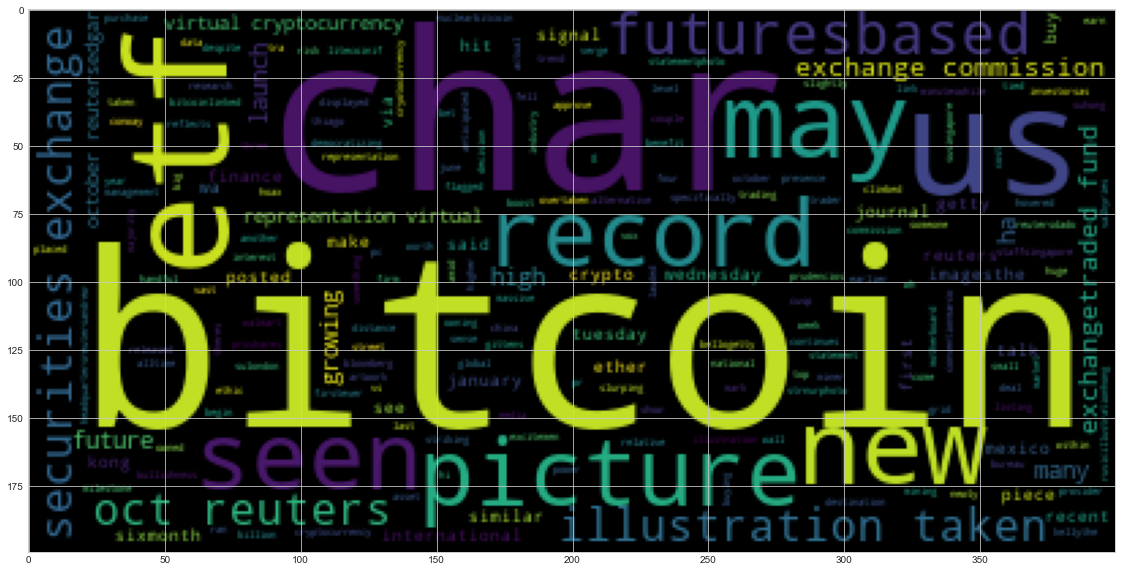

In [26]:
# Generate the Bitcoin word cloud
btc_words = ' '.join(top10_btc_words_list)
btc_wordclouds = WordCloud().generate(btc_words)
plt.imshow(btc_wordclouds)

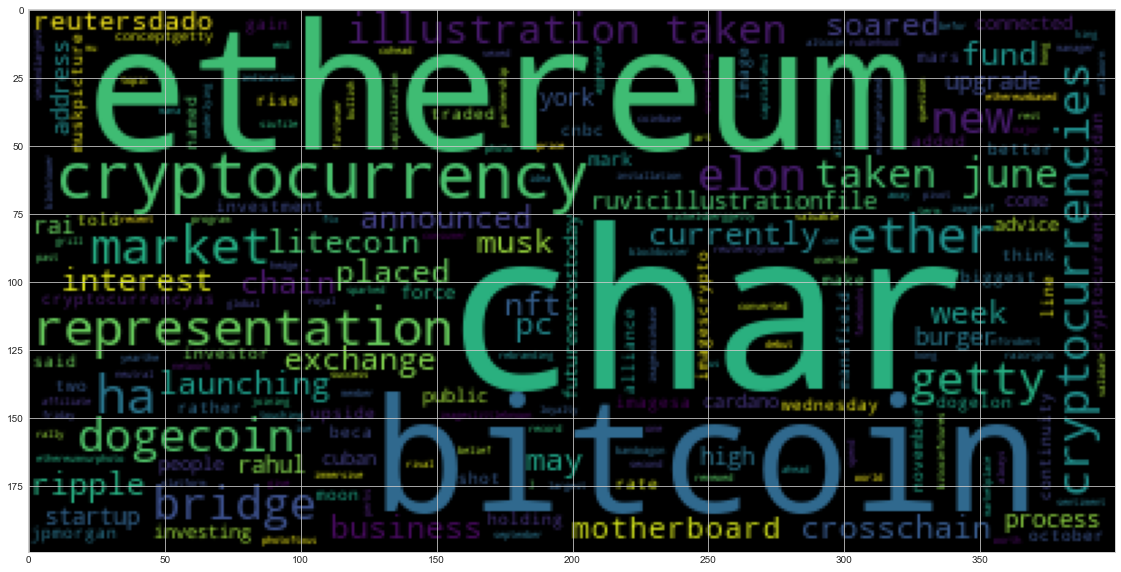

In [27]:
# Generate the Ethereum word cloud
eth_words = ' '.join(top10_eth_words_list)
eth_wordclouds = WordCloud().generate(eth_words)
plt.imshow(eth_wordclouds)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [28]:
import spacy
from spacy import displacy

In [29]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [30]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [32]:
# Concatenate all of the Bitcoin text together
concatenated_text_btc = []
for i in range(len(btc_df.index)):
    concatenated_text_btc.append(btc_df.iloc[i, 1])
concatenated_text_btc = ' '.join(concatenated_text_btc)

In [34]:
# Run the NER processor on all of the text
ner_proc = nlp(concatenated_text_btc)

# Add a title to the document
ner_proc.user_data["title"] = "Bitcoin NER"

In [35]:
# Render the visualization
displacy.render(ner_proc, style='ent')

In [36]:
# List all Entities
for entities in ner_proc.ents:
    print(entities.text, entities.label_)

earlier this year DATE
Verge ORG
Vox Media ORG
Thiago Prudencio/S PERSON
$1.6 billion MONEY
Wednesday DATE
a couple of minutes TIME
U.S. GPE
U.S. GPE
China GPE
Last week DATE
the Wall Street Journal ORG
three CARDINAL
Journal ORG
Bitcoin ORG
Bloomberg ORG
the National Bureau ORG
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/IllustrationHONG KONG ORG
Oct 21 DATE
Reuters ORG
October 19, 2021 DATE
REUTERS ORG
Edgar SuLONDON PERSON
Oct 20 DATE
Reuters ORG
Securities and Exchange Commission ORG
Andrew Kelly PERSON
The US Securities and Exchange Commission ORG
as many as four CARDINAL
October DATE
October 18, 2021 DATE
REUTERS ORG
Edgar SuSINGAPORE PERSON
Oct 19 DATE
Reuters ORG
six-month DATE
October 19, 2021 DATE
REUTERS ORG
Edgar SuHONG KONG PERSON
Oct 20 DATE
Reuters ORG
Wednesday DATE
first ORDINAL
U.S. GPE
Conway G. Gittens PERSON
Reuters ORG
Reuters ORG
six-month DATE
Tuesday DATE
U.S. GPE
NurPhoto ORG
Getty Images ORG
first ORDINAL
Tuesday DATE
ProShares PERSON
2021 DATE
Marco Bello PERS

---

### Ethereum NER

In [37]:
# Concatenate all of the Ethereum text together
concatenated_text_eth = []
for i in range(len(eth_df.index)):
    concatenated_text_eth.append(eth_df.iloc[i, 1])
concatenated_text_eth = ' '.join(concatenated_text_eth)

In [38]:
# Run the NER processor on all of the text
ner_proc_eth = nlp(concatenated_text_eth)

# Add a title to the document
ner_proc_eth.user_data["title"] = "Ethereum NER"

In [39]:
# Render the visualization
displacy.render(ner_proc_eth, style='ent')

In [40]:
# List all Entities
for entities in ner_proc_eth.ents:
    print(entities.text, entities.label_)

Ethereum PERSON
Cardano PERSON
Nervos  PERSON
today DATE
the Force Bridge FAC
Mark Cuban PERSON
CNBC ORG
Wednesday DATE
two CARDINAL
Jordan Mansfield PERSON
JPMorgan ORG
Elon Musk PERSON
Getty Images ORG
Elon Musk PERSON
3,780% PERCENT
October DATE
Dogelon Mars PRODUCT
0.00000229 MONEY
November 1 DATE
0.0 MONEY
Getty Images ORG
the past week DATE
Hong Kong GPE
September 30, 2021 DATE
FTX ORG
NFT ORG
Robert Nickelsberg PERSON
Getty Images ORG
Coinbase Global PERSON
NFT ORG
the end of the year DATE
US GPE
NurPhoto PERSON
first ORDINAL
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/Illustration/File Photo MU ORG
Burger King ORG
Robinhood GPE
Bitcoin , Ethereum and Dogecoin ORG
Royal Perks ORG
5 MONEY
Rahul Rai PERSON
Market Neutral ORG
BlockTower Capital ORG
Rahul Rai PERSON
Rahul Rai PERSON
second ORDINAL
4,400 MONEY
Friday DATE
Ethereum PERSON
Bitcoin’s ORG
second ORDINAL
Thursday DATE
6:13 p.m. TIME
New York GPE
Ethereum PERSON
CryptoPunk ORG
0x8e39 CARDINAL
NFT ORG
Lionsgate/Miramax ORG
Qu

---